# **Malaria Detection**

### <b>Executive Summary</b>
<font color='blue'>
Malaria, a treatable parasitic disease prevalent in sub-Saharan Africa, remains a leading cause of death in several endemic countries, particularly amongst children, due to insufficient access to timely and accurate diagnosis stemming from limited healthcare infrastructure. This proposal recommends integration of machine learning in the diagnostic workflow, and puts forward a solution which utilizes a convolutional neural network based on transfer learning for classification of uninfected and malaria parasitized samples from microscopic images of patient blood smears. The model achieved good overall performance, exhibiting low rates of false negatives (≤3%) and false positives (≤5%), and allows high throughput. It can be easily deployed in rural areas on a portable device such as a laptop, and operate independently of internet access. Integration with a user-friendly interface might eliminate the need for  trained staff. To further improve the performance of the model, I recommend architecture and parameter fine-tuning based on training with an extended pathologist-annotated dataset that includes information on parasite species and life cycle stage. Additionally, to broaden model capabilities and impact, I recommend implementation of cell segmentation and feature count to facilitate calculation of parasitic load to inform therapeutic intervention.
<br><br>


### <b>Problem and Solution Summary</b>
<font color='blue'>
Malaria poses a critical threat to global public health. When diagnosed early, the disease is largely treatable, but a significant bottleneck in efficient disease control is access to timely and accurate diagnosis, which leads to delayed treatment and increased transmission rates. Diagnostic difficulties arise from early symptoms that resemble those of other common diseases and from inadequate access to reliable diagnostic tools and skilled medical personnel in rural, resource-poor areas. This results in over 600,000 deaths each year, underscoring the urgent need for improved diagnostic solutions.
Currently, malaria diagnosis relies on expert microscopists visually inspecting patient blood smears for the presence of the parasite. Integration of machine learning models into existing diagnostic workflows to automate classification of images into uninfected and parasitized could increase access, throughput and accuracy of the diagnosis. This advancement has the potential to improve patient outcomes and ultimately curb the spread of the disease. To this end, I present a practical convolutional neural network model that achieves ~97% accuracy in classifying malaria cases. The solution makes use of transfer learning to achieve robust feature extraction while minimizing computational cost and need for extensive, well-annotated training dataset. The model is designed to be a high-throughput, self-contained solution that can operate on a local machine, making it ideal for deployment in areas with limited resources and infrastructure. <br><br></font>

### <b>Recommendations for Implementation</b>
<font color='blue'>
For optimal usability, I recommend model integration with a user-friendly interface prior to deployment. This interface should guide users on how to capture microscopic images compatible with the model, initiate automated image analysis, present results in a clear and easily interpretable format, and recommend next steps regarding patient isolation and treatment following a positive diagnosis. This approach will minimize the need for extensive training of the personnel using the system. In order to further validate and refine the model, I also suggest validation with an expanded dataset comprised of images of cells infected with different species of the malaria parasite, as well as encompassing different life cycle stages. Furthermore, cross validation on microscopic images of cells infected with parasites other than malaria will be crucial to ensure reliable classification across different contexts. Before widespread deployment, it is critical to conduct extensive on-site testing with real patient data to evaluate the model's performance and robustness. This testing should address potential external variables such as local parasite strains, variations in blood sample staining, and different imaging techniques. In addition, in  individuals infected with malaria, only ~20% of red blood cells carry the parasite. Guidelines need to be put in place outlining the number of red blood cells analyzed per patient, and what ratio of these needs to be classified as parasitized to ensure statistical significance and warrant positive diagnosis. It is also critical that the product adheres to local and international laws and regulation regarding medical devices and patient data privacy and that technical support is in place to address any potential issues. Lastly, continued monitoring of model performance following deployment will allow for model refinement and incorporation of feedback from end users in future releases. This approach will help maintain the model's accuracy and relevance in various settings. </font>

<br>
<br>

---



---



##<b>Problem Definition</b>
<br>

**The context: Why is this problem important to solve?**

<font color='blue'>
Malaria is a deadly tropical disease endemic in the subequatorial zone, including Central and South America, Africa, Southeast Asia and Oceania. The disease is caused by the Plasmodium parasite, which is spread to human blood via the bite of an Anopheles mosquito carrier. In 2022, the World Health Organization (WHO) reported 249 million cases of malaria, over half of which were diagnosed in the hotspot region comprised on four African countries, namely Nigeria, the Democratic Republic of Congo, Uganda and Mozambique. At risk groups include children, pregnant persons, the elderly, and individuals with compromised immune system (e.g. affected by HIV/AIDS, which is also endemic in the region).<br><br>
When diagnosed early, malaria is curable with chloroquine phosphate or artemisinin-based combination therapy; when allowed to progress untreated, it becomes life-threatening, which emphasizes the importance of correct early diagnosis. This has been a major challenge, however. Early symptoms of malaria are non-specific, such as fatigue, fever, nausea, headache, and chills. These can be easily ignored as benign or misdiagnosed as caused by a different parasitic, bacterial or viral agent. In the later stages of the disease, neurological manifestations such as confusion, seizures, and difficulty breathing become apparent, which frequently lead to patient death within 24 hours.
<br><br>
The gold standard technique for malaria diagnosis is microscopic examination of Giemsa-stained blood smears. It requires, however, highly trained specialists to review the images and correctly classify parasitic inclusions as Plasmodium, which can at times appear similar to Babesia (causative agent of babesiosis) or Trypanosoma species (causes African sleeping sickness). In addition, the staining technique used often produces staining artifacts which can lead to misdiagnosis. Access to a microscopist specialized in tropical medicine can be a challenge in rural sub-Saharan Africa, as well as in satellite sites around the world, which sporadically see cases of malaria brought into the country by citizens following travel. In case of a negative exam, blood examination often needs to be repeated every 12 hrs for multiple days to definitively exclude malaria diagnosis, which places significant burden on the provider and limits throughput. Card-like rapid diagnostic tests are easily portable, fast-acting, and do not require highly trained medical staff to interpret, but a positive test still needs to be followed up by a microscopic examination to confirm diagnosis, identify the Plasmodium species, and calculate parasitic load, since these factor into predicted disease progression and influence the treatment regiment. Given rapid progression, delaying microscopic test in favor of a rapid test might have detrimental effects. Development of an automated, high-throughput image classification system might facilitate timely and accurate diagnosis of malaria and aid in favorable patient outcomes.
</font>

<br><br>
**The objectives: What is the intended goal?**<br>
<font color='blue'>
The intended goal of this project is to develop an automated image analysis pipeline to enable classification of uninfected and malaria infected cells from microscopic images of blood smears, in order to eliminate the need for image review by a specialized physician. Ideally, the pipeline needs to be plug-and-play, high-throughput, easily portable and run on a local machine without the need for internet access, in order to facilitate implementation in rural areas by non-expert staff. It also needs to be highly accurate to prevent misdiagnosis.</font>

<br><br>

**The key questions: What are the key questions that need to be answered?**<br>
<font color='blue'>
The key question in this project is:
Can a ML model accurately classify uninfected and malaria parasitized cells from microscopic images of Giemsa-stained blood smears? This involves discrimination of parasitic inclusions from background and artefactual staining, and detection of different species of the Plasmodium parasite and different parasitic life cycle stages in blood. </font>

<br><br>

**The problem formulation: What is it that we are trying to solve using data science?**<br>
<font color='blue'>
We are trying to solve a real-life problem, which is access to quality healthcare in remote, rural areas. Residents of such regions usually suffer from an increase rate of complications and mortality from curable diseases, due to delayed diagnosis or access to treatment. We are trying to apply data science to improve access to accurate and early malaria detection, by automating microscopic image analysis of patient blood smears. Such pipeline needs to be easily implementable in rural areas by non-expert staff. To do so, we will train different neural network architectures and assess their performance to determine whether we can achieve high accuracy required of diagnostic tests. </font>

<br><br><br>

## <b>Data Description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br><br><br>


###<b> Mount the Drive

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Changing working directory
%cd /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning

/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning


### <b>Loading libraries</b>

In [ ]:
# Importing required libraries
import zipfile
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
import tensorflow as tf

### <b>Let us load the data</b>

**Note:**
- You must download the dataset from the link provided on Olympus and upload the same to your Google Drive. Then unzip the folder.

In [ ]:
# Commented out to prevent re-extracting each time the notebook is run
'''
# Extracting files from the zip file
with zipfile.ZipFile('cell_images.zip', 'r') as zip_ref:
    zip_ref.extractall()
'''

"\n# Extracting files from the zip file\nwith zipfile.ZipFile('cell_images.zip', 'r') as zip_ref:\n    zip_ref.extractall()\n"

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

Let's do the same for the training data first and then we will use the same code for the test data as well.

In [ ]:
# Creating empty lists to store training and testing data and labels
training_data = []
training_labels = []
testing_data = []
testing_labels = []

In [ ]:
# Extracting data and labels for parasitized cells from training data

# Defining the directory containing images
directory = '/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/cell_images/train/parasitized/'

# Iterating through each file in the directory and generating full file path
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Checking if the file path is correct
    if os.path.isfile(file_path):
        # Opening the image
        with Image.open(file_path) as img:
            # Resizing the image to 64x64
            image_resized = img.resize((64, 64))
            # Converting the resized image to array and appending to list
            training_data.append(np.array(image_resized))
            # Appending the label to the list
            training_labels.append(1)  # Append the label '1' for parasitized

In [ ]:
# Extracting data and labels for uninfected cells from training data

# Defining the directory containing images
directory = '/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/cell_images/train/uninfected/'

# Iterating through each file in the directory and generating full file path
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Checking if the file path is correct
    if os.path.isfile(file_path):
        # Opening the image
        with Image.open(file_path) as img:
            # Resizing the image to 64x64
            image_resized = img.resize((64, 64))
            # Converting the resized image to array and appending to list
            training_data.append(np.array(image_resized))
            # Appending the label to the list
            training_labels.append(0)  # Append the label '0' for uninfected

In [ ]:
# Printing the sizes of the lists to verify it matches the number of images in dataset
print("Number of images in training dataset: %d" % len(training_data))
print("Number of labels in training dataset: %d" % len(training_labels))

Number of images in training dataset: 24958
Number of labels in training dataset: 24958


In [ ]:
# Extracting data and labels for parasitized cells from testing data

# Defining the directory containing images
directory = '/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/cell_images/test/parasitized/'

# Iterating through each file in the directory and generating full file path
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Checking if the file path is correct
    if os.path.isfile(file_path):
        # Opening the image
        with Image.open(file_path) as img:
            # Resizing the image to 64x64
            image_resized = img.resize((64, 64))
            # Converting the resized image to array and appending to list
            testing_data.append(np.array(image_resized))
            # Appending the label to the list
            testing_labels.append(1)  # Append the label '1' for parasitized

In [ ]:
# Extracting data and labels for uninfected cells from testing data

# Defining the directory containing images
directory = '/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/cell_images/test/uninfected/'

# Iterating through each file in the directory and generating full file path
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)

    # Checking if the file path is correct
    if os.path.isfile(file_path):
        # Opening the image
        with Image.open(file_path) as img:
            # Resizing the image to 64x64
            image_resized = img.resize((64, 64))
            # Converting the resized image to array and appending to list
            testing_data.append(np.array(image_resized))
            # Appending the label to the list
            testing_labels.append(0)  # Append the label '0' for uninfected

In [ ]:
# Printing the sizes of the lists to verify it matches the number of images in dataset
print("Number of images in testing dataset: %d" % len(testing_data))
print("Number of labels in testing dataset: %d" % len(testing_labels))

Number of images in testing dataset: 2600
Number of labels in testing dataset: 2600


In [ ]:
# Converting the datasets into arrays
training_data_array = np.array(training_data)
testing_data_array = np.array(testing_data)

In [ ]:
# Converting the lists of labels into arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

###<b> Check the shape of train and test images

In [ ]:
# Defining a function to iterate through arrays to check their size and test for size equality

def check_array_shapes(arrays):
    # Geting the shape of the first array
    first_array_shape = arrays[0].shape
    all_equal = True
    # Checking if a shape of the nth array is equal to the size of the first array
    for array in arrays:
        if array.shape != first_array_shape:
            all_equal = False
            break

    if all_equal:
        print(f"All arrays have the same shape: {first_array_shape}")
    else:
        print("Arrays have differeny shapes")

In [ ]:
# Calling the function to check array size on training data
check_array_shapes(training_data_array)

All arrays have the same shape: (64, 64, 3)


In [ ]:
# Calling the function to check array size on testing data
check_array_shapes(testing_data_array)

All arrays have the same shape: (64, 64, 3)


###<b> Check the shape of train and test labels

In [ ]:
# Printing the shape of training labels
print("The shape of the training labels is: %d" % training_labels.shape)

The shape of the training labels is: 24958


In [ ]:
# Printing the shape of testing labels
print("The shape of the training labels is: %d" % testing_labels.shape)

The shape of the training labels is: 2600


In [ ]:
# Defining a function to check for duplicate images within train and test datasets

def find_duplicates(dataset):
    duplicates_within_dataset = []
    for i in range(len(dataset)):
        for j in range(i + 1, len(dataset)):
            if np.array_equal(dataset[i], dataset[j]):
                duplicates_within_dataset.append((i, j))
    return duplicates_within_dataset

In [ ]:
# Defining a function to check for duplicate images across the datasets

def find_duplicates_across_datasets(dataset1, dataset2):
    duplicates_across_dataset = []
    for i, img1 in enumerate(dataset1):
        for j, img2 in enumerate(dataset2):
            if np.array_equal(img1, img2):
                duplicates_across_dataset.append((i, j))
    return duplicates_across_dataset

In [ ]:
# Testing for duplicates within the training dataset
duplicates_within_training = find_duplicates(training_data_array)
print("Duplicates within training dataset:", duplicates_within_training)

Duplicates within training dataset: []


In [ ]:
# Testing for duplicates within the testing dataset
duplicates_within_testing = find_duplicates(testing_data_array)
print("Duplicates within testing dataset:", duplicates_within_testing)

Duplicates within testing dataset: []


In [ ]:
duplicates_across_datasets = find_duplicates_across_datasets(training_data_array, testing_data_array)
print("Duplicates across training and testing datasets:", duplicates_across_datasets)

Duplicates across training and testing datasets: []


In [ ]:
# Saving the arrays to file
np.save('training_data_array.npy', training_data_array)
np.save('testing_data_array.npy', testing_data_array)
np.save('training_labels.npy', training_labels)
np.save('testing_labels.npy', testing_labels)

<b> Observations and insights:</b><br>
<font color='blue'>
The dataset contains 27558 unique images split ~90%:10% into training (24958 images) and testing (2600 images). Given the total size of the dataset, I think 90:10 split is reasonable to train and test the models. The images are now in the form of three dimensional arrays (64, 64, 3). Labels are stored in 1D arrays.</font>

### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Checking the minimum and maximum pixel values for train and test images
print("Minimum pixel value for images in the training dataset is: %d" % training_data_array.min())
print("Minimum pixel value for images in the testing dataset is: %d" % testing_data_array.min())
print()
print("Maximum pixel value for images in the training dataset is: %d" % training_data_array.max())
print("Maximum pixel value for images in the testing dataset is: %d" % testing_data_array.max())

Minimum pixel value for images in the training dataset is: 0
Minimum pixel value for images in the testing dataset is: 0

Maximum pixel value for images in the training dataset is: 255
Maximum pixel value for images in the testing dataset is: 255


<b> Observations and insights: </b><br>
<font color='blue'>
The data is currently on a 0-225 pixel intensity scale. I will normalize the data on a 0-1 scale for machine learing to help with stability of gradient descent and to speed up convergence.</font>



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Counting the number of items within each label in the training dataset
counter_training = Counter(training_labels)
counter_training

Counter({1: 12582, 0: 12376})

In [ ]:
# Counting the number of items within each label in the testing dataset
counter_testing = Counter(testing_labels)
counter_testing

Counter({1: 1300, 0: 1300})

<b> Observations and insights: </b><br>
<font color='blue'>
The data appears balanced, exhibiting a roughly 50:50 split between the two classes in training and testing datasets.</font>



###<b>Normalize the images

In [ ]:
# Saving a copy of the dataframes in RGB, 0-255 scale
training_data_array_0_255 = training_data_array.copy()
testing_data_array_0_255 = testing_data_array.copy()

In [ ]:
# Setting the format of the data as float32
training_data_array = training_data_array.astype('float32')
testing_data_array = testing_data_array.astype('float32')

# Normalizing the data to 0-1 scale through division by maximum pixel intensity value
training_data_norm = training_data_array / 255.0
testing_data_norm = testing_data_array / 255.0

# Checking if the data has been correctly normalized
print("Minimum pixel value for normalized images in the training dataset is: %d" % training_data_norm.min())
print("Minimum pixel value for normalized images in the testing dataset is: %d" % testing_data_norm.min())
print()
print("Maximum pixel value for normalized images in the training dataset is: %d" % training_data_norm.max())
print("Maximum pixel value for normalized images in the testing dataset is: %d" % testing_data_norm.max())


Minimum pixel value for normalized images in the training dataset is: 0
Minimum pixel value for normalized images in the testing dataset is: 0

Maximum pixel value for normalized images in the training dataset is: 1
Maximum pixel value for normalized images in the testing dataset is: 1


In [ ]:
# Saving a copy of the arrays
np.save('training_data_norm.npy', training_data_norm)
np.save('testing_data_norm.npy', testing_data_norm)
np.save('training_data_array_0_255.npy', training_data_array_0_255)
np.save('testing_data_array_0_255.npy', testing_data_array_0_255)

<b> Observations and insights:</b><br>
<font color='blue'>
The data has been successfully normalized on a 0-1 pixel intensity scale.</font>

###<b> Plot to check if the data is balanced

In [ ]:
# Combining the count data generated earlier into dataframes and appending dataset labels
df_counter_training = pd.DataFrame(list(counter_training.items()), columns=['Label', 'Frequency'])
df_counter_training['Category'] = 'Training'

df_counter_testing = pd.DataFrame(list(counter_testing.items()), columns=['Label', 'Frequency'])
df_counter_testing['Category'] = 'Testing'

# Concatenating the dataframes
df_counter = pd.concat([df_counter_training, df_counter_testing], ignore_index=True)
df_counter

,Label,Frequency,Category
0,1,12582,Training
1,0,12376,Training
2,1,1300,Testing
3,0,1300,Testing


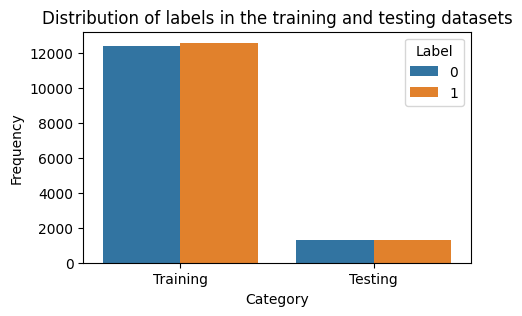

In [ ]:
# Plotting the frequency of labels in each dataset
plt.figure(figsize=(5, 3))
sns.barplot(x='Category', y='Frequency', hue='Label', data=df_counter)
plt.title('Distribution of labels in the training and testing datasets')
plt.show()

<b> Observations and insights:</b><br>
<font color='blue'>
The data in both training and testing subsets appears fairly balanced. In the training dataset, there are 12582 parasitized and 12376 uninfected images (50.4% : 49.6% split). In the testing dataset, there are 1300 parasitized and 1300 uninfected images (50% : 50% split).</font>

### <b>Data Exploration</b>
Let's visualize the images from the train data

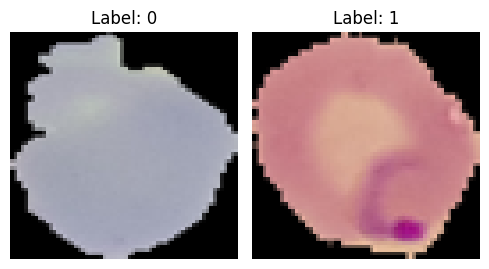

In [ ]:
# Generating a figure displaying one random uninfected and one random parasitizef image from the training dataset

# Unique labels
unique_labels = np.unique(training_labels)

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(5, 3))

# Flatten the axes
axes = axes.flatten()

for i, label in enumerate(unique_labels):
    # Get indices of images with the current label
    indices = np.where(training_labels == label)[0]
    # Select a random index from the indices
    random_index = np.random.choice(indices)
    # Get the corresponding image and label
    image = training_data_norm[random_index]

    # Display the image
    axes[i].imshow(image)
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

'''
# Hide any remaining empty subplots
for j in range(len(unique_labels), len(axes)):
    axes[j].axis('off')
'''

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


###<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

---

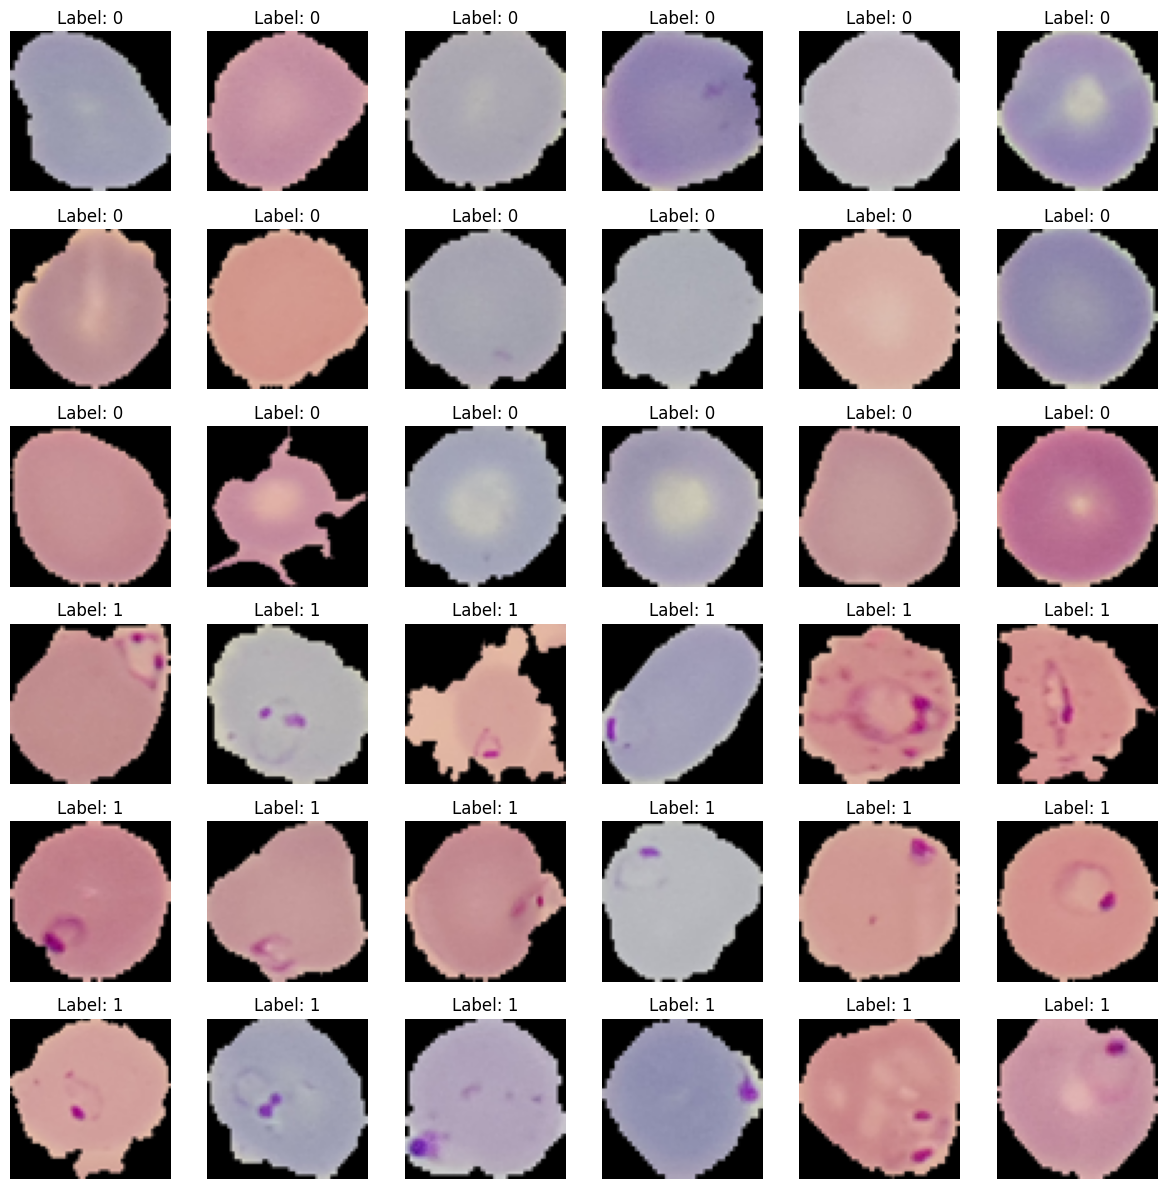

In [ ]:
# Visualizing random 18 uninfected and 18 parasitized images in a single figure

# Number of images to display (6x6 grid)
num_images = 36

# Unique labels
unique_labels = np.unique(training_labels)

# Number of images per label
images_per_label = num_images // len(unique_labels)

# Create a figure with subplots
fig, axes = plt.subplots(6, 6, figsize=(12, 12))

# Flatten the axes
axes = axes.flatten()

# Counter for subplot index
plot_idx = 0

# Iterate through each unique label
for label in unique_labels:
    # Get indices of images with the current label
    indices = np.where(training_labels == label)[0]
    # Select a random subset of indices
    selected_indices = np.random.choice(indices, images_per_label, replace=False)

    # Display each selected image
    for idx in selected_indices:
        image = training_data_norm[idx]
        axes[plot_idx].imshow(image)
        axes[plot_idx].set_title(f"Label: {label}")
        axes[plot_idx].axis('off')
        plot_idx += 1


# Hide remaining empty subplots
for i in range(plot_idx, len(axes)):
    axes[i].axis('off')


# Adjust layout and display the figure
plt.tight_layout()
plt.show()

<b>Observations and insights:</b> <br>
<font color='blue'>
Cells infected with the malaria parasite appear to have purple, round-ish inclusions. There is heterogeneity in the shape, size and number of the inclusion bodies. Uninfected cells appear relatively uniform across, without any distinct intracellular features (a few images seem to include some imperfections and/or artefactual staining within the cell body). There is significant variation in color of the red blood cells in both classes, ranging from pale grayish purple to intense pinkish purple, possibly to to light variation during imaging.</font>

###<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Splitting the training data into parasitized and uninfected labels

parasitized_training_data_norm = []
uninfected_training_data_norm = []

for i in range(len(training_data_norm)):
    if training_labels[i] == 1:
        parasitized_training_data_norm.append(training_data_norm[i])
    else:
        uninfected_training_data_norm.append(training_data_norm[i])

In [ ]:
# Calculating the averagevalues for parasitized and uninfected images
mean_parasitized_norm = np.mean(parasitized_training_data_norm, axis=0)
mean_uninfected_norm = np.mean(uninfected_training_data_norm, axis=0)

<b> Mean image for parasitized

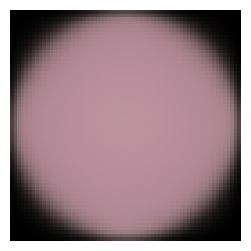

In [ ]:
# Visualizing an average parasitized image
plt.figure(figsize=(5, 3))
plt.imshow(mean_parasitized_norm)
plt.axis('off')
plt.show()

<b> Mean image for uninfected

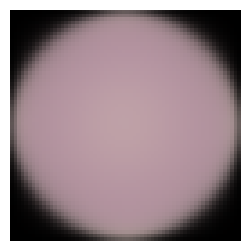

In [ ]:
# Visualizing an average uninfected image
plt.figure(figsize=(5, 3))
plt.imshow(mean_uninfected_norm)
plt.axis('off')
plt.show()

<b> Observations and insights: </b><br>
<font color='blue'>
At first glance, there are no obvious differences when comparing averaged images of all parasitized and uninfected cell images in the training dataset. The parasitized cells appear to be a slightly darker shade of pink than the uninfected ones, but no distinct intracellular structures are visible. Looking at individual examples of images belonging to each class, averaging dilutes the signal visible in individual images of parasitized cells, likely due to small size and differences in number and subcellular location of the parasitic inclusions.</font>

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
# Converting the training dataset from RGB to HSV
hsv_training = []

for i in range(0, 24958, 1):
    # Converting from RGB to BGR by swapping channels
    image_bgr = training_data_array_0_255[i][..., ::-1]
    # Converting from BGR to HSV
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    hsv_training.append(image_hsv)

# Saving HSV images into array
hsv_training = np.array(hsv_training)

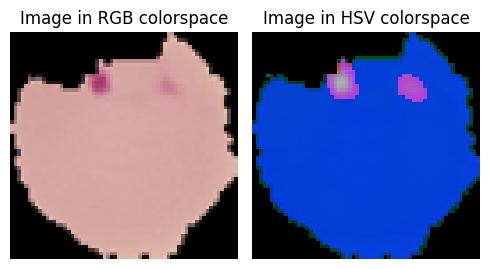

In [ ]:
# Displaying an example parasitized image in RGB and HSV colorscales
plt.figure(figsize=(5, 3))

# Plotting image in RGB
plt.subplot(1, 2, 1)
plt.imshow(training_data_norm[0])
plt.title('Image in RGB colorspace')
plt.axis('off')

# Plotting image in HSV
plt.subplot(1, 2, 2)
plt.imshow(hsv_training[0])
plt.title('Image in HSV colorspace')
plt.axis('off')

# Adjusting layout and displaying the figure
plt.tight_layout()
plt.show()

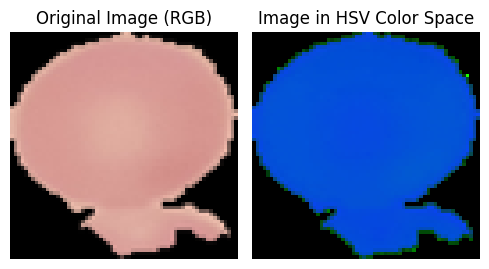

In [ ]:
# Display the original and HSV images using matplotlib
plt.figure(figsize=(5, 3))

# Original Image in RGB
plt.subplot(1, 2, 1)
plt.imshow(training_data_norm[24900])
plt.title('Original Image (RGB)')
plt.axis('off')

# HSV Image
plt.subplot(1, 2, 2)
plt.imshow(hsv_training[24900])
plt.title('Image in HSV Color Space')
plt.axis('off')

plt.tight_layout()
plt.show()

###<b> Converting the test data

In [ ]:
# Converting the testing dataset from RGB to HSV
hsv_testing = []

for i in range(0, 2600, 1):
    # Converting from RGB to BGR by swapping channels
    image_bgr = testing_data_array_0_255[i][..., ::-1]
    # Converting from BGR to HSV
    image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)
    hsv_testing.append(image_hsv)

# Saving HSV images into array
hsv_testing = np.array(hsv_testing)

In [ ]:
# Saving the arrays to file
np.save('hsv_training.npy', hsv_training)
np.save('hsv_testing.npy', hsv_testing)

In [ ]:
# Normalizing the training HSV images on 0-1 scale

normalized_hsv_training = []

for hsv_image in hsv_training:
    # Normalize each channel
    hsv_image = hsv_image.astype(np.float32)
    # Normalize H channel
    hsv_image[:, :, 0] = hsv_image[:, :, 0] / 179.0
    # Normalize S channel
    hsv_image[:, :, 1] = hsv_image[:, :, 1] / 255.0
    # Normalize V channel
    hsv_image[:, :, 2] = hsv_image[:, :, 2] / 255.0
    normalized_hsv_training.append(hsv_image)

normalized_hsv_training = np.array(normalized_hsv_training)

In [ ]:
# Normalizing the testing HSV images on 0-1 scale

normalized_hsv_testing = []

for hsv_image in hsv_testing:
    # Normalize each channel
    hsv_image = hsv_image.astype(np.float32)
    # Normalize H channel
    hsv_image[:, :, 0] = hsv_image[:, :, 0] / 179.0
    # Normalize S channel
    hsv_image[:, :, 1] = hsv_image[:, :, 1] / 255.0
    # Normalize V channel
    hsv_image[:, :, 2] = hsv_image[:, :, 2] / 255.0
    normalized_hsv_testing.append(hsv_image)

normalized_hsv_testing = np.array(normalized_hsv_testing)

In [ ]:
# Checking that the length of each dataset is as expected
print(len(normalized_hsv_training))
print(len(normalized_hsv_testing))

24958
2600


In [ ]:
# Saving the arrays to file
np.save('normalized_hsv_training.npy', normalized_hsv_training)
np.save('normalized_hsv_testing.npy', normalized_hsv_testing)

####<b>Observations and insights: </b><br>
<font color='blue'>
The HSV color space (stands for hue, saturation, value) allows separation of color information from intensity.
It might facilitate segmentation based on color (hue) irrespective of lightning conditions (saturation and brightness). Application of HSV scale might be useful to minimize the effects of lightning seein in individual sample images and help us in extraction of features (purple inclusions characteristic of parasitized cells, blood cell boundaries etc.).</font>



###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on RGB train data

In [ ]:
# Applying Gaussian blurring on normalized RGB data in training dataset

blurred_train = []

for i in range(0, 24958, 1):

  a = cv2.GaussianBlur(training_data_norm[i], (3, 3), 0)

  blurred_train.append(a)

blurred_train = np.array(blurred_train)

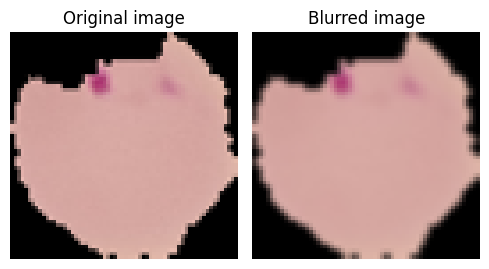

In [ ]:
# Displaying an example parasitized original and blurred image
plt.figure(figsize=(5, 3))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(training_data_norm[0])
plt.title('Original image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_train[0])
plt.title('Blurred image')
plt.axis('off')

plt.tight_layout()
plt.show()

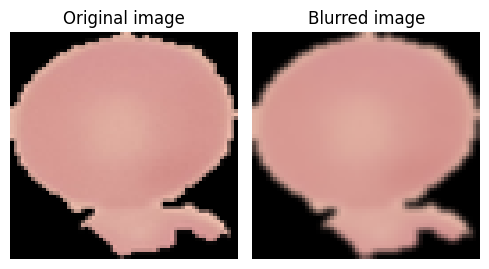

In [ ]:
# Displaying an example uninfected original and blurred image
plt.figure(figsize=(5, 3))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(training_data_norm[24900])
plt.title('Original image')
plt.axis('off')

# Blurred image
plt.subplot(1, 2, 2)
plt.imshow(blurred_train[24900])
plt.title('Blurred image')
plt.axis('off')

plt.tight_layout()
plt.show()

###<b> Gaussian Blurring on RGB test data

In [ ]:
# Applying Gaussian blurring on normalized RGB data in testing dataset

blurred_test = []

for i in range(0, 2600, 1):

  a = cv2.GaussianBlur(testing_data_norm[i], (3, 3), 0)

  blurred_test.append(a)

blurred_test = np.array(blurred_test)

In [ ]:
# Saving arrays to file
np.save('blurred_train.npy', blurred_train)
np.save('blurred_test.npy', blurred_test)

###<b> Gaussian Blurring on HSV train data

In [ ]:
# Applying Gaussian blurring on normalized HSV data in training dataset

blurred_hsv_train = []

for i in range(0, 24958, 1):

  a = cv2.GaussianBlur(normalized_hsv_training[i], (3, 3), 0)

  blurred_hsv_train.append(a)

blurred_hsv_train = np.array(blurred_hsv_train)

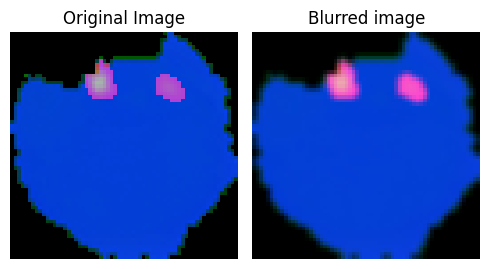

In [ ]:
# Displaying an example parasitized original and blurred image
plt.figure(figsize=(5, 3))

# Original image in HSV
plt.subplot(1, 2, 1)
plt.imshow(hsv_training[0])
plt.title('Original Image')
plt.axis('off')

# Blurred HSV image
plt.subplot(1, 2, 2)
plt.imshow(blurred_hsv_train[0])
plt.title('Blurred image')
plt.axis('off')

plt.tight_layout()
plt.show()

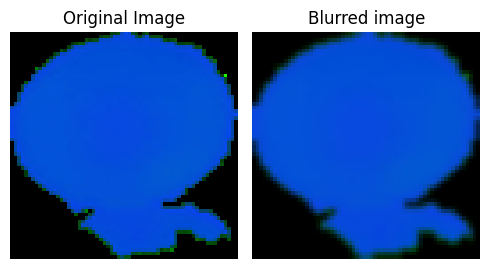

In [ ]:
# Displaying an example uninfected original and blurred image
plt.figure(figsize=(5, 3))

# Original image in HSV
plt.subplot(1, 2, 1)
plt.imshow(hsv_training[24900])
plt.title('Original Image')
plt.axis('off')

# Blurred HSV image
plt.subplot(1, 2, 2)
plt.imshow(blurred_hsv_train[24900])
plt.title('Blurred image')
plt.axis('off')

plt.tight_layout()
plt.show()

###<b> Gaussian Blurring on HSV test data

In [ ]:
# Applying Gaussian blurring on normalized HSV data in testing dataset

blurred_hsv_test = []

for i in range(0, 2600, 1):

  a = cv2.GaussianBlur(normalized_hsv_testing[i], (3, 3), 0)

  blurred_hsv_test.append(a)

blurred_hsv_test = np.array(blurred_hsv_test)

In [ ]:
# Saving arrays to file
np.save('blurred_hsv_train.npy', blurred_hsv_train)
np.save('blurred_hsv_test.npy', blurred_hsv_test)

**Think About It:** Would blurring help us for this problem statement in any way? What else can we try?
<br>
<font color='blue'>
I'm not sure whether blurring will help us to discriminate between uninfected and parasitized cells. On one hand, blurring might help us reduce the appearance of non-specific background staining or other artefacts that can be present in microscopic images. This might allow us to amplify gross patterns, increase signal to noise, and translate to improved feature extraction and accuracy of identification of true malaria inclusions while minimizing overfitting.
On the other hand, parasitic inclusions are fairly small, so harsh blurring might dilute the signal and eliminate fine details, which might have been important for effective training of the model.
Other approaches that we could try to help in classification are histogram equalization, application of edge detection filters, and data augmentation to diversify our training dataset.</font>

## **Model Building**

### **Base Model**

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Importing required libraries
import zipfile
from PIL import Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import cv2
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from random import shuffle
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, LeakyReLU, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

In [ ]:
# Clearing backend and fixing the seed for random number generators
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Building and testing the base model </b>

<font color='blue'>
Since the problem involves identification of patterns in images for diagnostic purposes, I chose to focus on exploring different CNN architectures rather than ANNs. CNNs are more suitable for classification of objects from images, since they are good at capturing local patterns in the data, and pooling layers allow object classification irrespective of its position or orientation within an image, which is important given the heterogeneity of the distribution of parasitic inclusions within the cells.</font>

<font color='blue'>
I will first explore how different image processing techniques applied to the input data affect the performance of this base model. I will train and test the model on the data in RGB colorscale, HSV colorscale, as well as after applying Gaussian blurring.</font>

###<b> Input data in RGB, normalized </b>

In [ ]:
# Read in labels from file
training_labels = np.load('training_labels.npy')
testing_labels = np.load('testing_labels.npy')

In [ ]:
# Reading in relevant datasets
training_data_norm = np.load('training_data_norm.npy')
testing_data_norm = np.load('testing_data_norm.npy')

In [ ]:
# Split the training data into training and validation with shuffling to prevent capturing of only a single class from the training dataset sorted by label
train_data, val_data, train_labels, val_labels = train_test_split(training_data_norm, training_labels, test_size=0.3, shuffle=True)

####<B>One Hot Encoding the train and test labels

In [ ]:
# One-hot encode train labels
training_labels_ohe = tf.keras.utils.to_categorical(train_labels)

# One-hot encode validation labels
validation_labels_ohe = tf.keras.utils.to_categorical(val_labels)

# One-hot encode test labels
testing_labels_ohe = tf.keras.utils.to_categorical(testing_labels)

In [ ]:
print(training_labels.shape)
print(testing_labels.shape)
print(training_labels_ohe.shape)
print(validation_labels_ohe.shape)
print(testing_labels_ohe.shape)

(24958,)
(2600,)
(17470, 2)
(7488, 2)
(2600, 2)


In [ ]:
# Defining and compiling the model

def model_1():
    model = Sequential()

    # Defining the input layer
    model.add(Input(shape=(64, 64, 3)))

    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Fourth Convolutional Block
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Flattening the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(2, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Calling the function and storing the model in a new variable
model1 = model_1()

# Printing the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 623,458 (2.38 MB)

 Trainable params: 622,978 (2.38 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3), ModelCheckpoint('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB.keras', monitor = 'val_loss', save_best_only = True, mode='min', verbose=1)]

In [ ]:
# Fitting and training the base model
history_model1 = model1.fit(x= train_data, y=training_labels_ohe, validation_data=(val_data, validation_labels_ohe), batch_size=128, epochs=25, callbacks = callbacks, verbose=1)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 864ms/step - accuracy: 0.6462 - loss: 5.2475
Epoch 1: val_loss improved from inf to 3.35354, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 136s 957ms/step - accuracy: 0.6468 - loss: 5.2367 - val_accuracy: 0.4929 - val_loss: 3.3535
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.9434 - loss: 1.3043
Epoch 2: val_loss did not improve from 3.35354
137/137 ━━━━━━━━━━━━━━━━━━━━ 135s 903ms/step - accuracy: 0.9435 - loss: 1.3023 - val_accuracy: 0.4929 - val_loss: 3.9142
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.9719 - loss: 0.5155
Epoch 3: val_loss did not improve from 3.35354
137/137 ━━━━━━━━━━━━━━━━━━━━ 140s 894ms/step - accuracy: 0.9719 - loss: 0.5149 - val_accuracy: 0.4929 - val_loss: 3.5298
Epoch 4/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 832ms/step - accuracy: 0.9727 - loss: 0.2952
Epoch 4: val_loss imp

<b>Plotting the train and validation curves

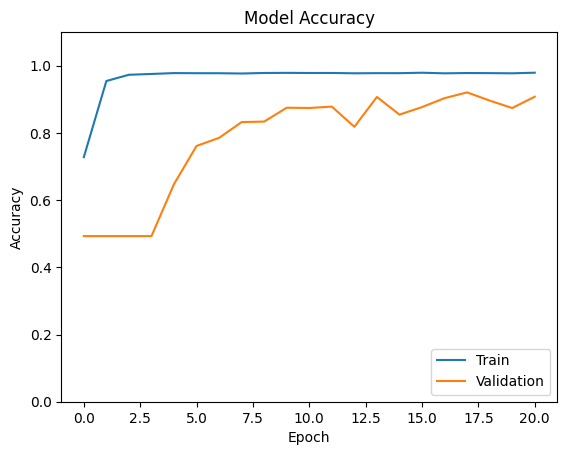

In [ ]:
# Retrieving model accuracy on test and validation datasets from history and plotting it for each epoch
plt.plot(history_model1.history['accuracy'])
plt.plot(history_model1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.ylim(0, 1.1)
plt.show()

<b> Evaluating the model on test data

In [ ]:
# Loading the best model
model1 = load_model('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB.keras')

In [ ]:
# Making predictions on the test dataset
predictions_test = model1.predict(testing_data_norm)
# Reversing one-hot encoded labels to original label format
predicted_classes_test = np.argmax(predictions_test, axis = 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


In [ ]:
# Reversing the one-hot encoding of testing labels to original format
testing_labels_rev = np.argmax(testing_labels_ohe, axis = 1)

<b> Plotting the confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1300
           1       1.00      0.86      0.92      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



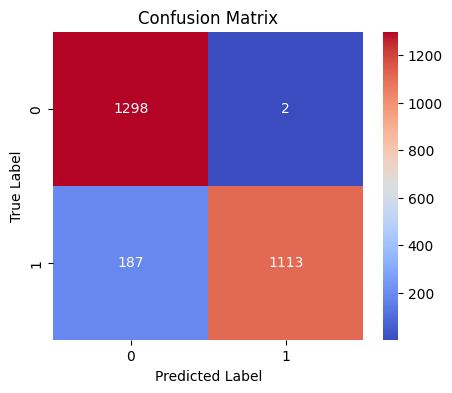

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(testing_labels_rev, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(testing_labels_rev, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(2), yticklabels=range(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<b> Observations: </b><br>
<font color='blue'>
The base model trained on normalized RGB data performs relatively well. Performance on train data improved rapidly over the initial epochs, reaching plateau around epoch 3 and final accuracy of ~98%. Accuracy on validation data increases gradually, reaching 92% in epoch 18. The difference in performance on train and validation datasets might indicate that the model is slightly overfitting to training data.<br>
Assessment of model performance on testing dataset yielded pretty good results, achieving 94% precision and 93% recall. The model performed better on classifying uninfected cells (87% precision and 100% recall) than parasitized cells (100% precision but 86% recall). This might result in underdiagnosis of a fraction of patients, so I would like to improve recall for class 1.
</font>

In [ ]:
del training_data_norm, testing_data_norm, history_model1, model1, train_data, val_data, train_labels, val_labels

In [ ]:
# Clearing backend and fixing the seed for random number generators
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Input data in HSV, normalized </b>

In [ ]:
# Reading in the relevant datasets
normalized_hsv_training = np.load('normalized_hsv_training.npy')
normalized_hsv_testing = np.load('normalized_hsv_testing.npy')

In [ ]:
# Split the training data into training and validation with shuffling
train_data, val_data, train_labels, val_labels = train_test_split(normalized_hsv_training, training_labels, test_size=0.3, shuffle=True)

In [ ]:
# One-hot encode train labels
training_labels_ohe = tf.keras.utils.to_categorical(train_labels)

# One-hot encode validation labels
validation_labels_ohe = tf.keras.utils.to_categorical(val_labels)

In [ ]:
# Defining and compiling the model

def model_2():
    model = Sequential()

    # Defining the input layer
    model.add(Input(shape=(64, 64, 3)))

    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Fourth Convolutional Block
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Flattening the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(2, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Calling the function and storing the model in a new variable
model2 = model_2()

# Printing the summary of the model
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 623,458 (2.38 MB)

 Trainable params: 622,978 (2.38 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3), ModelCheckpoint('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_HSV.keras', monitor = 'val_loss', save_best_only = True, mode='min', verbose=1)]

In [ ]:
# Fitting and training the base model
history_model2 = model2.fit(x= train_data, y=training_labels_ohe, validation_data=(val_data, validation_labels_ohe), batch_size=128, epochs=25, callbacks = callbacks, verbose=1)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 865ms/step - accuracy: 0.7055 - loss: 5.1231
Epoch 1: val_loss improved from inf to 5.21142, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_HSV.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 135s 953ms/step - accuracy: 0.7061 - loss: 5.1130 - val_accuracy: 0.4929 - val_loss: 5.2114
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 830ms/step - accuracy: 0.9571 - loss: 1.3411
Epoch 2: val_loss improved from 5.21142 to 4.02044, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_HSV.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 136s 907ms/step - accuracy: 0.9571 - loss: 1.3390 - val_accuracy: 0.4929 - val_loss: 4.0204
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 834ms/step - accuracy: 0.9695 - loss: 0.5196
Epoch 3: val_loss improved from 4.02044 to 2.79539, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/model

<b>Plotting the train and validation curves

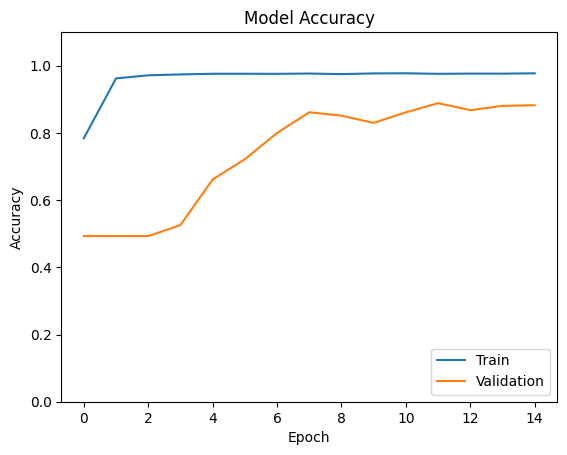

In [ ]:
# Retrieving model accuracy on test and validation datasets from history and plotting it for each epoch
plt.plot(history_model2.history['accuracy'])
plt.plot(history_model2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.ylim(0, 1.1)
plt.show()

<b> Evaluating the model on test data

In [ ]:
# Loading the best
model2 = load_model('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_HSV.keras')

In [ ]:
# Making predictions on the test set
predictions_test = model2.predict(normalized_hsv_testing)
# Reversing one-hot encoded labels to original label format
predicted_classes_test = np.argmax(predictions_test, axis = 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


<b> Plotting the confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1300
           1       1.00      0.81      0.89      1300

    accuracy                           0.90      2600
   macro avg       0.92      0.90      0.90      2600
weighted avg       0.92      0.90      0.90      2600



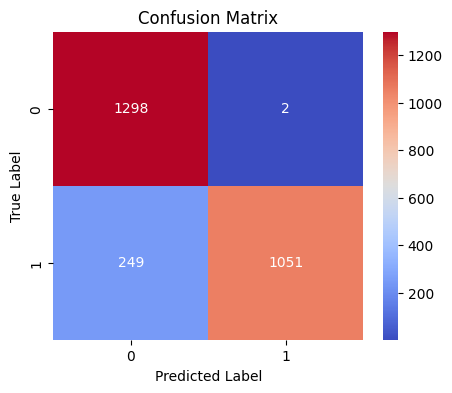

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(testing_labels_rev, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(testing_labels_rev, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(2), yticklabels=range(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<b> Observations: </b><br>
<font color='blue'>
The base model trained on normalized HSV data performed slightly worse than the one trained on normalized RGB data. Performance on train data improved rapidly over the initial epochs, reaching plateau around epoch 3 and final accuracy of ~97%. Accuracy on validation data increased gradually, reaching 89% in epoch 12. The difference in performance on train and validation datasets might indicate that the model is slightly overfitting to training data.<br>
Assessment of model performance on testing dataset yielded pretty good results, achieving 92% precision and 90% recall. The model performed better on classifying uninfected cells (84% precision and 100% recall) than parasitized cells (100% precision but 81% recall). Overall, given higher number of cases of parasitized cells misclassification with HSV images, I will stick to RGB color space for the next model training and apply Gaussian blurring to see if it improves model performance.
</front>

In [ ]:
del val_data, val_labels, train_data, train_labels, model2, normalized_hsv_training, normalized_hsv_testing, history_model2

In [ ]:
# Clearing backend and fixing the seed for random number generators
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> Input data in RGB with Gaussian blurring </b>

In [ ]:
# Reading in the relevant datasets
blurred_train = np.load('blurred_train.npy')
blurred_test = np.load('blurred_test.npy')

In [ ]:
# Split the training data into training and validation with shuffling
train_data, val_data, train_labels, val_labels = train_test_split(blurred_train, training_labels, test_size=0.3, shuffle=True)

In [ ]:
# One-hot encode train labels
training_labels_ohe = tf.keras.utils.to_categorical(train_labels)

# One-hot encode validation labels
validation_labels_ohe = tf.keras.utils.to_categorical(val_labels)

# One-hot encode test labels
testing_labels_ohe = tf.keras.utils.to_categorical(testing_labels)

In [ ]:
# Defining and compiling the model

def model_3():
    model = Sequential()

    # Defining the input layer
    model.add(Input(shape=(64, 64, 3)))

    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Fourth Convolutional Block
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Flattening the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(2, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Calling the function and storing the model in a new variable
model3 = model_3()

# Printing the summary of the model
model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 623,458 (2.38 MB)

 Trainable params: 622,978 (2.38 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3), ModelCheckpoint('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB_blurring.keras', monitor = 'val_loss', save_best_only = True, mode='min', verbose=1)]

In [ ]:
# Fitting and training the base model
history_model3 = model1.fit(x= train_data, y=training_labels_ohe, validation_data=(val_data, validation_labels_ohe), batch_size=128, epochs=25, callbacks = callbacks, verbose=1)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 901ms/step - accuracy: 0.9752 - loss: 0.1500
Epoch 1: val_loss improved from inf to 0.49967, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB_blurring.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 140s 972ms/step - accuracy: 0.9752 - loss: 0.1499 - val_accuracy: 0.8361 - val_loss: 0.4997
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 835ms/step - accuracy: 0.9765 - loss: 0.1471
Epoch 2: val_loss improved from 0.49967 to 0.30277, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB_blurring.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 133s 911ms/step - accuracy: 0.9766 - loss: 0.1470 - val_accuracy: 0.9172 - val_loss: 0.3028
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 857ms/step - accuracy: 0.9770 - loss: 0.1434
Epoch 3: val_loss did not improve from 0.30277
137/137 ━━━━━━━━━━━━━━━━━━━━ 146s 938ms/step - accuracy: 0.9770 - loss: 0.1433 - val_

<b>Plotting the train and validation curves

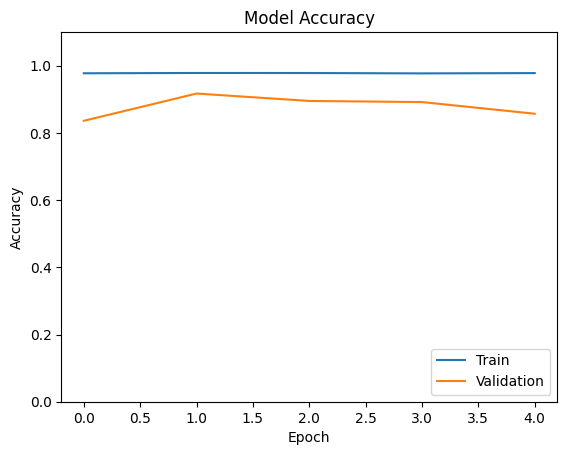

In [ ]:
# Retrieving model accuracy on test and validation datasets from history and plotting it for each epoch
plt.plot(history_model3.history['accuracy'])
plt.plot(history_model3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.ylim(0, 1.1)
plt.show()

<b> Evaluating the model on test data

In [ ]:
# Loading best model
model3 = load_model('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model1_RGB_blurring.keras')

In [ ]:
# Making predictions on the test dataset
predictions_test = model3.predict(blurred_test)
# Reversing one-hot encoded labels to original label format
predicted_classes_test = np.argmax(predictions_test, axis = 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


<b> Plotting the confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      1300
           1       1.00      0.56      0.72      1300

    accuracy                           0.78      2600
   macro avg       0.85      0.78      0.77      2600
weighted avg       0.85      0.78      0.77      2600



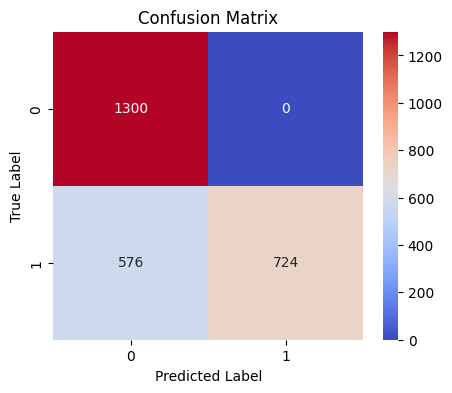

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(testing_labels_rev, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(testing_labels_rev, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(2), yticklabels=range(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<b> Observations: </b><br>
<font color='blue'>
The base model trained on Gaussian-blurred RGB data performed worse than the one trained on normalized RGB data without blurring. During training, high accuracy (~98%) on train data was achieved in the first epoch and remained constant throughout training. Accuracy on validation set peaked at 92% in epoch 2 and did not increase in further epochs. The discrepancy in accuracy of prediction on the two datasets might indicate an issue with generalization. This became apparent during validation on testing data. The model performed rather poorly on unseen data. Overall, while we observed 85% precision, 78% recall, and zero cases of false positives, recall for class 1 (parasitized cells) was very low (56%), meaning that it is not suitable for diagnostic purposes. Further exploration of image pre-processing techniques could be tried on this dataset, including different color systems, as well as parameter tuning, e.g. the degree of Gaussian blurring.
</font>

In [ ]:
del blurred_train, blurred_test, history_model3, model3, train_data, val_data, train_labels, val_labels

In [ ]:
# Clearing backend and fixing the seed for random number generators
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

###<b> General observations on image manipulation types and performance of the base model: </b><br>
<font color='blue'>
Having tested some of the image pre-processing methods, non-blurred RGB dataset yielded the best outcome with the base model. It performed best cross multiple metrics, importantly giving the highest recall for class 1. This is still a pretty low score, so I will next use this dataset as input and test additional CNN architectures to see if I can improve precision, recall and f1-score. </font>

###<b> Model 2
####<b> Trying to improve the performance of our model by adding new layers


So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Building and compiling the model

In [ ]:
# Reading in relevant datasets
training_data_norm = np.load('training_data_norm.npy')
testing_data_norm = np.load('testing_data_norm.npy')

In [ ]:
# Split the training data into training and validation with shuffling
train_data, val_data, train_labels, val_labels = train_test_split(training_data_norm, training_labels, test_size=0.3, shuffle=True)

In [ ]:
# One-hot encode train labels
training_labels_ohe = tf.keras.utils.to_categorical(train_labels)

# One-hot encode validation labels
validation_labels_ohe = tf.keras.utils.to_categorical(val_labels)

In [ ]:
# Defining and compiling the model

def model_5():
    model = Sequential()

    # Defining the input layer
    model.add(Input(shape=(64, 64, 3)))

    # First Convolutional Block
    model.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=l2(0.005), input_shape=(64, 64, 3)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=l2(0.005)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=l2(0.005)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Fourth Convolutional Block
    model.add(Conv2D(256, (3, 3), padding="same", kernel_regularizer=l2(0.005)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Fifth Convolutional Block
    model.add(Conv2D(512, (3, 3), padding="same", kernel_regularizer=l2(0.005)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.4))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Flattening the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(512, kernel_regularizer=l2(0.005)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.4))

    # Additional Dense Layer
    model.add(Dense(256, kernel_regularizer=l2(0.005)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(2, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
# Calling the function and storing the model in a new variable
model5 = model_5()

# Printing the summary of the model
model5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 256)           │           1,0

 Total params: 2,753,474 (10.50 MB)

 Trainable params: 2,751,490 (10.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

<b> Using Callbacks

In [ ]:
# Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3), ModelCheckpoint('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model5.keras', monitor = 'val_loss', save_best_only = True, mode='min', verbose=1)]

<b>Fit and Train the model

In [ ]:
# Fitting and training the base model
history_model5 = model5.fit(x= train_data, y=training_labels_ohe, validation_data=(val_data, validation_labels_ohe), batch_size=128, epochs=25, callbacks = callbacks, verbose=1)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5903 - loss: 9.7381
Epoch 1: val_loss improved from inf to 9.47106, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model5.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.5905 - loss: 9.7362 - val_accuracy: 0.4929 - val_loss: 9.4711
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7087 - loss: 8.7764
Epoch 2: val_loss did not improve from 9.47106
137/137 ━━━━━━━━━━━━━━━━━━━━ 427s 3s/step - accuracy: 0.7089 - loss: 8.7747 - val_accuracy: 0.4929 - val_loss: 9.7433
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8407 - loss: 7.7930
Epoch 3: val_loss did not improve from 9.47106
137/137 ━━━━━━━━━━━━━━━━━━━━ 378s 3s/step - accuracy: 0.8409 - loss: 7.7913 - val_accuracy: 0.4929 - val_loss: 10.1022
Epoch 4/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9161 - loss: 6.9011
Epoch 4: val_loss improved from 9.47106 to 8.

<b> Plotting the train and the validation curves

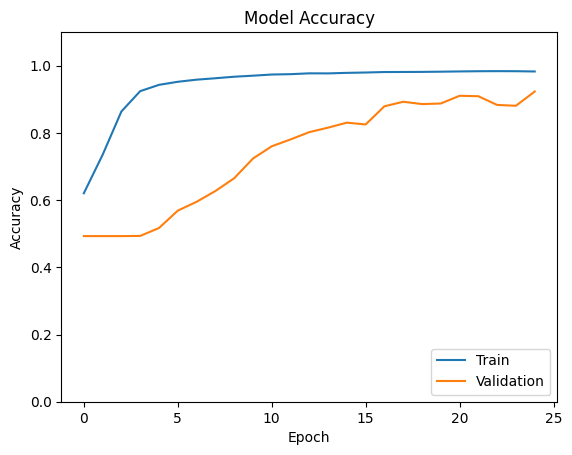

In [ ]:
# Retrieving model accuracy on test and validation datasets from history and plotting it for each epoch
plt.plot(history_model5.history['accuracy'])
plt.plot(history_model5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.ylim(0, 1.1)
plt.show()

###<b> Evaluating the model

In [ ]:
# Load best model
model5 = load_model('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model5.keras')

In [ ]:
# Making predictions on the test dataset
predictions_test = model5.predict(testing_data_norm)
# Reversing one-hot encoded labels to original label format
predicted_classes_test = np.argmax(predictions_test, axis = 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step


<b> Plotting the confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1300
           1       1.00      0.84      0.91      1300

    accuracy                           0.92      2600
   macro avg       0.93      0.92      0.92      2600
weighted avg       0.93      0.92      0.92      2600



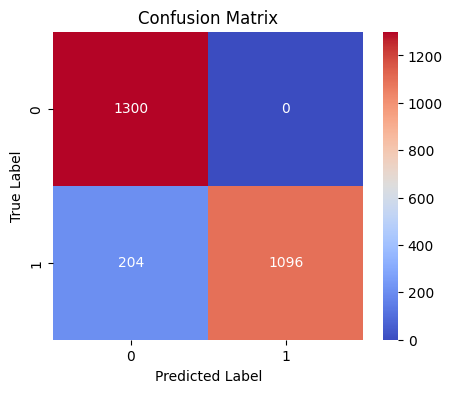

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(testing_labels_rev, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(testing_labels_rev, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(2), yticklabels=range(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<b> Observations:</b><br>
<font color='blue'>
Changing the activation function to LeakyReLU and addition of one extra convolutional block did not improve the performance of the model on test data compared to the base model. The different architecture slightly reduced misclassification of uninfected cases, but significantly increased misclassification of infected cases. Since the model performs well on train and validation datasets but not as well on the test data, it might be an indication that the model is too complex and does not generalize well or that the validation or testing datasets are not large enough or not representative of the classes. </font>

###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



<font color='blue'>
I will apply image augmentation techniques such as flipping, rotation and shear; I decided to avoid scaling and random cropping given the small size of the parasitic inclusions, since we run into the possibility of losing the informative features in the augmented image.</font>

In [ ]:
del train_data, val_data, train_labels, val_labels, model5, history_model5, predictions_test, predicted_classes_test

In [ ]:
# Clearing backend and fixing the seed for random number generators
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Reading in relevant datasets
training = np.load('training_data_array_0_255.npy')
testing = np.load('testing_data_norm.npy')

In [ ]:
# Splitting train dataset and labels into train and vaidation (70:30)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data, validation_data, train_labels, validation_labels = train_test_split(training, training_labels_ohe, test_size=0.3, random_state=42)

In [ ]:
# Creating ImageDataGenerators for augmentation

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=30,shear_range=0.2, horizontal_flip=True, vertical_flip = True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_data, train_labels, batch_size=128, seed = 42, shuffle = True)
validation_generator = validation_datagen.flow(validation_data, validation_labels, batch_size=58, seed = 42, shuffle = True)

####<B>Visualizing Augmented images

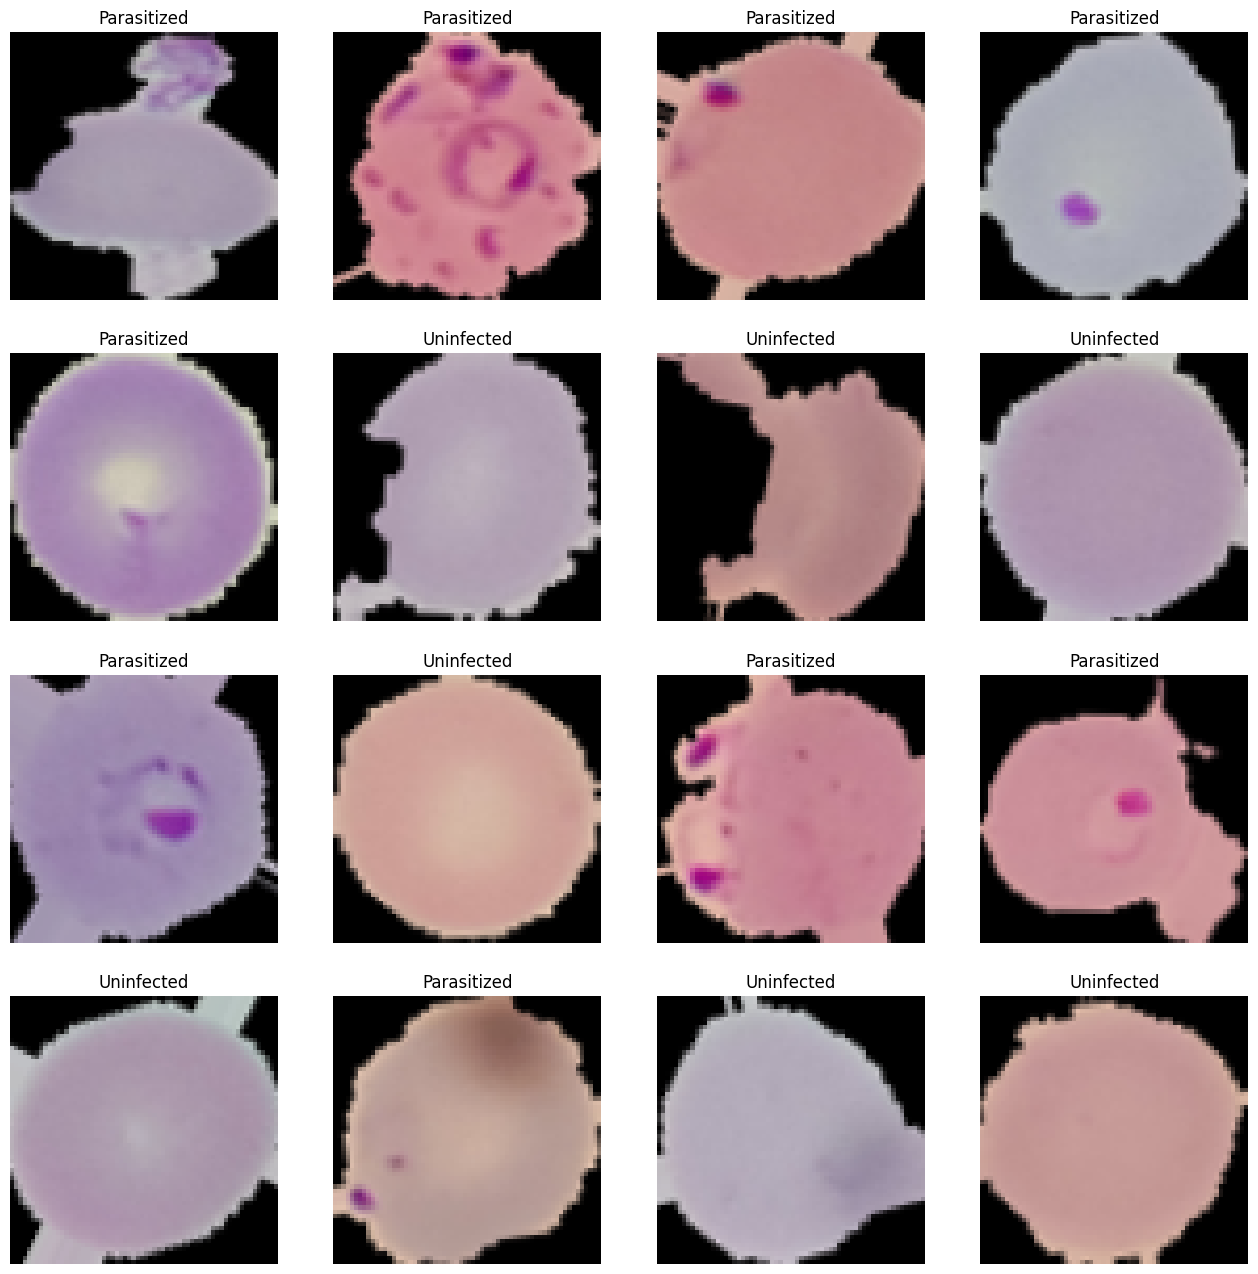

In [ ]:
# Visualizing random selection of parasitized and uninfected augmented images
images, labels = next(train_generator)
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):
    ax.imshow(image)
    if label[1] == 1:
        ax.set_title('Parasitized')
    else:
        ax.set_title('Uninfected')
    ax.axis('off')

###<b>Building the Model

In [ ]:
# Defining and compiling the model

def model_6():
    model = Sequential()

    # Defining the input layer
    model.add(Input(shape=(64, 64, 3)))

    # First Convolutional Block
    model.add(Conv2D(16, (3, 3), padding="same", activation="relu", input_shape=(64, 64, 3), kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Second Convolutional Block
    model.add(Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Third Convolutional Block
    model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Fourth Convolutional Block
    model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D((2, 2)))
    model.add(BatchNormalization())

    # Flattening the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(256, activation="relu", kernel_regularizer=l2(0.01)))
    model.add(Dropout(0.4))

    # Output Layer
    model.add(Dense(2, activation="softmax"))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


<b>Using Callbacks

In [ ]:
# Calling the function and storing the model in a new variable
model6 = model_6()

# Printing the summary of the model
model6.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 623,458 (2.38 MB)

 Trainable params: 622,978 (2.38 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
# Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3), ModelCheckpoint('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model6_augmented.keras', monitor = 'val_loss', save_best_only = True, mode='min', verbose=1)]

<b> Fit and Train the model

In [ ]:
# Fitting and training the model
history_model6 = model6.fit(train_generator, epochs=25, validation_data=validation_generator, callbacks=callbacks, verbose=1)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6634 - loss: 5.1223
Epoch 1: val_loss improved from inf to 3.28750, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model6_augmented.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.6640 - loss: 5.1117 - val_accuracy: 0.4929 - val_loss: 3.2875
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9327 - loss: 1.2879
Epoch 2: val_loss improved from 3.28750 to 3.13338, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model6_augmented.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9328 - loss: 1.2859 - val_accuracy: 0.4929 - val_loss: 3.1334
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.9659 - loss: 0.5157
Epoch 3: val_loss improved from 3.13338 to 2.99431, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/model

###<B>Evaluating the model

<b>Plot the train and validation accuracy

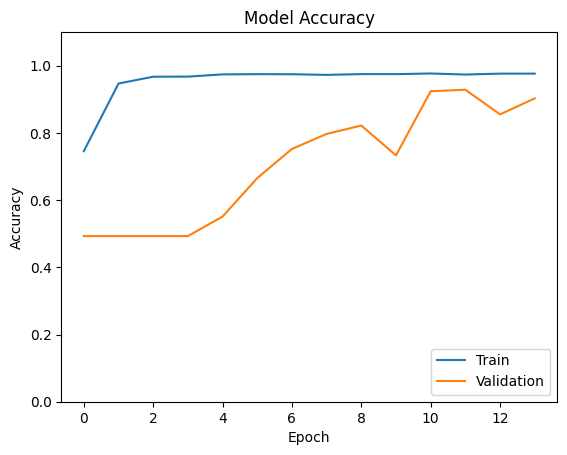

In [ ]:
# Retrieving model accuracy on test and validation datasets from history and plotting it for each epoch
plt.plot(history_model6.history['accuracy'])
plt.plot(history_model6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
# Loading best model
model6 = load_model('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_model6_augmented.keras')

In [ ]:
# Making predictions on the test dataset
predictions_test = model6.predict(testing)
# Reversing one-hot encoded labels to original label format
predicted_classes_test = np.argmax(predictions_test, axis = 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step


<B>Plotting the classification report and confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1300
           1       1.00      0.86      0.93      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



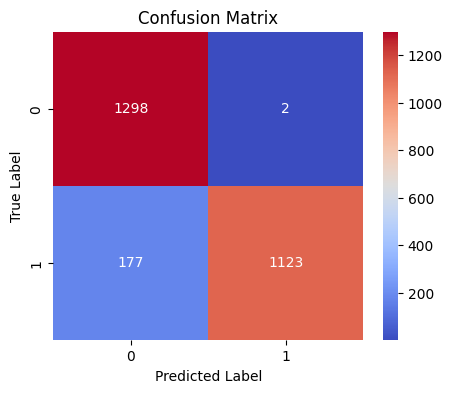

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(testing_labels_rev, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(testing_labels_rev, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(2), yticklabels=range(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<b>Observations and insights:</b><br>
<font color='blue'>
Introduction of image augmentation on the training dataset marginally improved model performance (recall for class 1 increased, resulting in misclassification of 177 parasitized samples, in contrast to 187 cases of misclassification for the same model without augmentation). The modest effects of image augmentation are not unexpected due to the nature of input data: blood cells and parasitic inclusions are fairly symmetric (circular and uniform), and the dataset captures varied subcellular localization of the parasitites, so augmentation techniques such as rotation and flipping have minimal effect on dataset diversity and feature extraction.
</font>

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
del model6, history_model6, predictions_test, predicted_classes_test, train_data, train_datagen, validation_datagen, train_generator, validation_generator
del validation_data, validation_datagen, validation_labels, validation_generator
del validation_labels_ohe, image, images, label, labels
del train_generator, testing_labels
del vgg16, x, output, modelvgg16
del training_labels_ohe

In [ ]:
# Clearing backend and fixing the seed for random number generators
from tensorflow.keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Reading in relevant datasets
training_data_norm = np.load('training_data_norm.npy')
testing_data_norm = np.load('testing_data_norm.npy')

In [ ]:
# Split the training data into training and validation with shuffling
train_data, val_data, train_labels, val_labels = train_test_split(training_data_norm, training_labels, test_size=0.3, shuffle=True)

####<B>One Hot Encoding the train and test labels

In [ ]:
# One-hot encode train labels
training_labels_ohe = tf.keras.utils.to_categorical(train_labels)

# One-hot encode validation labels
validation_labels_ohe = tf.keras.utils.to_categorical(val_labels)

In [ ]:
# Importing the VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))
vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Setting VGG16 layers at non-trainable
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
# Adding classification layers on top of VGG16 model and compiling the model
x = vgg16.get_layer('block4_pool').output
x = Flatten()(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.3)(x)

output = Dense(2, activation='softmax')(x)

modelvgg16 = Model(inputs=vgg16.input, outputs=output)
modelvgg16.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Printing the model summary to see the architecture
modelvgg16.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,831,106 (45.13 MB)

 Trainable params: 4,195,842 (16.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

###<b>Compiling the model

In [ ]:
# Using callbacks
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5), ModelCheckpoint('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_modelvgg16.keras', monitor = 'val_loss', save_best_only = True, mode='min', verbose=1)]

<b>Fit and Train the model

In [ ]:
# Fitting and training the base model
history_modelvgg16 = modelvgg16.fit(x= train_data, y=training_labels_ohe, validation_data=(val_data, validation_labels_ohe), batch_size=128, epochs=25, callbacks = callbacks, verbose=1)

Epoch 1/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7068 - loss: 7.3408
Epoch 1: val_loss improved from inf to 0.15329, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_modelvgg16.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 1069s 8s/step - accuracy: 0.7078 - loss: 7.3026 - val_accuracy: 0.9451 - val_loss: 0.1533
Epoch 2/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9361 - loss: 0.1674
Epoch 2: val_loss improved from 0.15329 to 0.11552, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_modelvgg16.keras
137/137 ━━━━━━━━━━━━━━━━━━━━ 1102s 8s/step - accuracy: 0.9362 - loss: 0.1673 - val_accuracy: 0.9599 - val_loss: 0.1155
Epoch 3/25
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9546 - loss: 0.1348
Epoch 3: val_loss improved from 0.11552 to 0.10930, saving model to /content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_modelv

<b>Plot the train and validation accuracy

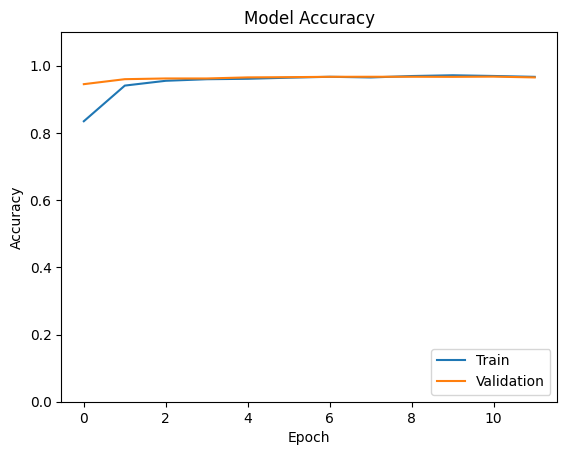

In [ ]:
# Retrieving model accuracy on test and validation datasets from history and plotting it for each epoch
plt.plot(history_modelvgg16.history['accuracy'])
plt.plot(history_modelvgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
# Loading best model
modelvgg16 = load_model('/content/drive/MyDrive/1. Capstone Project/Malaria Detection - Deep Learning/models/best_modelvgg16.keras')

In [ ]:
# Making predictions on the test dataset
predictions_test = modelvgg16.predict(testing_data_norm)
# Reversing one-hot encoded labels to original label format
predicted_classes_test = np.argmax(predictions_test, axis = 1)

82/82 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step


###<b> Evaluating the model

<b>Plotting the classification report and confusion matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1300
           1       0.95      0.97      0.96      1300

    accuracy                           0.96      2600
   macro avg       0.96      0.96      0.96      2600
weighted avg       0.96      0.96      0.96      2600



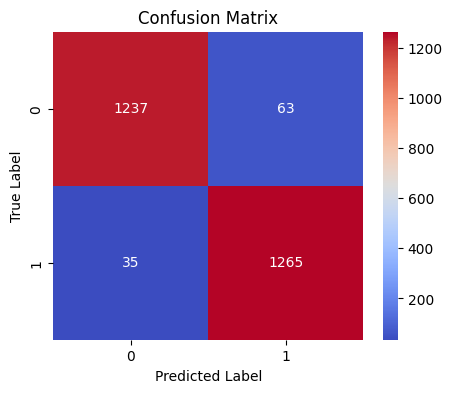

In [ ]:
# Printing classification report
print("Classification Report:")
print(classification_report(testing_labels_rev, predicted_classes_test))

# Computing confusion matrix
cm = confusion_matrix(testing_labels_rev, predicted_classes_test)

# Plotting confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=range(2), yticklabels=range(2))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###<b>Think about it:</b>
*  What can be observed from the validation and train curves?
*  What observations and insights can be drawn from the confusion matrix and classification report?
*  Choose the model with the best accuracy scores from all the above models and save it as a final model.


**Observations and insights:**<br>
<font color='blue'>
Transfer learning with the VGG16 pre-trained model performed well in our image classification task. The model is comprised of 11,831,106 total parameters (4,195,842 trainable parameters) and achieved high accuracy on both the training and validation datasets (~98% and ~95% respectively). The shape of curves for training and validation datasets looked the most similar across epochs out of all the models evaluated in this exercise. Good generalization was confirmed during evaluation on the test dataset; we achieved good performance across all evaluation criteria. The rate of true positives was high, and rate of false positives was low, for both uninfected and parasitized classes.
<br>
One of the most important performance indicators, in my opinion, is recall for class 1, which tells us how well the model identifies positive (parasitized) cases; a low number would indicate that we fail to detect patients infected with malaria, which might have severe adverse effects for them. On the other hand, while not ideal, misclassification of uninfected patients as infected would be less serious and likely quickly corrected at repeated testing. Our class 1 recall is at 97%, which is within a reasonable margin of error and in agreement with literature findings for other ML models and other malaria diagnostic assays. While higher than in other models tested, the number of false positives is low enough to be quickly caught on repeat testing, without adding too much workload to limit throughput.</font>



#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?<br>
<font color='blue'>
Insights from the data are that while uninfected cells appear rather uniform on stained bloodsmears, parasitized cells have round-ish, purple-ish parasitic inclusions. There is significant variation in the number, shape, strength of staining and cellular localization of the parasite in the infected cells.<br>
I've tested different image pre-processing techniques on the dataset, including blurring, HSV colorspace and image augmentation, and while some led to slightly increased performance, overall they had modest effects on the accuracy of the models, likely due to the nature of the dataset (e.g. both cells and parasites are largely round-ish so augmentation techniques such as flip or rotation do not add much meaningful information). Most models performed well in classification of uninfected cells, but to varrying degrees misclassified parasitized cells.


####**Comparison of various techniques and their relative performance**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?<br>
<font color='blue'>
All the tested model architectures trained from scratch performed slightly worse than the VGG16-based transfer learning model. I've had issues with model overfitting and had to deploy multiple regularization techniques to limit overfitting. There is definitely space to experiment further with different CNN architectures, including regularization techniques, and image augmentation techniques, which might improve performance of the models trained from scratch.
<br>
While the VGG16-based model performs fairly well, maximizing model performance is crucial in medical diagnosis. I would recommend further model optimization, including fine-tuning by unfreezing a few of the top layers of the VGG16 backbone model and joint re-training with the classifier layer. This might make the layers responsible for higher-order feature representation more tailored to identification and classification of parasitic inclusions from stained blood smears. It might also be worthwhile to test deep transfer learning CNN architectures such as ResNet or Inception which have been shown to perform well in histology classification tasks.


####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?<br>
<font color='blue'>
Out of all the CNN architectures tested, I would recommend transfer learning with the VGG16 model. The model generalizes well and achieved the highest overall accuracy (96%) on the test data. It also achieved the highest recall for parasitized cases (97%), which limits false negative diagnoses. Compared to other architectures it displays a slightly higher rate of false positives, but in my opinion this is not a major issue, since any positive diagnoses would likely be followed up by a repeat test, which would correct the diagnosis. In-depth investigation into samples misclassified as false positives and false negatives might allow for further model fine-tuning and improve its performance. This model has been trained on a relatively small set of images. If the model was to be deployed globally, it should be re-trained on a more complex dataset. Since malaria can be caused by different strains of the Plasmodium parasite, and prevalence of the different strains varies geographically, it would be crucial to ensure that the model accurately classifies all the strains, otherwise residents of certain regions would get frequently misdiagnosed. Furthermore,  the parasite undergoes different life cycle stages in human blood, and each stage looks slightly different on Giemsa stained blood smears. Collection of a bigger and better annotated training dataset (including balanced representation of different parasite strains and life cycle stages) might fine-tune feature extraction by the model and lead to better model performance. Since the model would be deployed in regions where multiple tropical parasitic diseases are endemic and co-infections are common, it would also be crucial to ensure that the model does not misclassify other parasitic diseases as malaria, and that it can still recognize malaria-infected cells when they are co-infected with other species.




---



---


